## Ilustrace OOP: Objektově orientovaná reprezentace a vizualizace vektorových objektů
Cílem této úlohy je navrhnout a implementovat systém jednoduché vektorové grafiky v jazyce Python, který bude využívat principy objektově orientovaného programování (OOP). Jednotlivé grafické objekty budou reprezentovány třídami, které umožní manipulaci s geometrií a její vizuální zobrazení pomocí knihovny matplotlib.

## Požadavky na řešení
1. Návrh společné základní třídy
Vytvořte třídu `GraphicObject`, která bude sloužit jako základ pro všechny grafické prvky. Tato třída má obsahovat:

* reprezentaci souřadnic definujících objekt
* metodu pro posunutí objektu `move(dx, dy)`
* metodu pro rotaci objektu `rotate(angle, origin)`
* abstraktní metodu `draw(ax)` pro vykreslení

Souřadnicová data můžete reprezentovat např. pomocí numpy polí.

### Konkrétní grafické třídy
Implementujte alespoň tři následující třídy dědící ze GrafickyObjekt:

* `Point` (bod v rovině)
* `Line` (úsečka definovaná dvěma body)
* `Rectangle` (obdélník definovaný polohou rohu, šířkou a výškou)

Každá třída musí implementovat vlastní metodu draw(ax) pro vykreslení prvku v matplotlib.

### Transformace
Všechny objekty musí umět:

* posun o libovolný vektor (metoda `move`)
* rotaci o daný úhel kolem daného středu otáčení (metoda `rotate`)

Transformace se mají provádět numericky nad vektory souřadnic.

### Seskupování objektů
Vytvořte třídu `Group`, která bude obsahovat více grafických objektů.
Tato třída má umožňovat:

* přidávání objektů do skupiny (metoda `add`)
* posun a rotaci celé skupiny (aplikovanou na všechny prvky)
* vykreslení celé skupiny jediným příkazem

## Testovací úloha
Sestavte scénu obsahující:

* bod
* úsečku
* obdélník
* (skupinu, která obsahuje několik z těchto objektů)

Nad skupinou proveďte:

* rotaci o zadaný úhel
* posun o zadaný vektor

Výsledek vizuálně zobrazte.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
class GraphicObject:
    def __init__(self):
        self.points = np.empty((0, 2))  # Each derived class fills this

    def move(self, dx, dy):
        """Translate the object by vector (dx, dy)."""
        self.points += np.array([dx, dy])

    def rotate(self, angle_deg, origin=(0, 0)):
        """Rotate object around given origin."""
        angle = np.radians(angle_deg)
        R = np.array([[np.cos(angle), -np.sin(angle)],
                      [np.sin(angle),  np.cos(angle)]])
        self.points = (self.points - origin) @ R.T + origin

    def draw(self, ax):
        raise NotImplementedError("Derived classes must implement draw()")

In [13]:
class Point(GraphicObject):
    def __init__(self, x, y):
        super().__init__()
        self.points = np.array([[x, y]])

    def draw(self, ax):
        ax.plot(self.points[:,0], self.points[:,1], 'o')

In [14]:
class Line(GraphicObject):
    def __init__(self, x1, y1, x2, y2):
        super().__init__()
        self.points = np.array([[x1, y1], [x2, y2]])

    def draw(self, ax):
        ax.plot(self.points[:,0], self.points[:,1], '-')

In [15]:
class Rectangle(GraphicObject):
    def __init__(self, x, y, width, height):
        super().__init__()
        self.points = np.array([
            [x, y],
            [x+width, y],
            [x+width, y+height],
            [x, y+height],
            [x, y]  # closed loop
        ])

    def draw(self, ax):
        ax.plot(self.points[:,0], self.points[:,1], '-')


In [16]:
class Group(GraphicObject):
    def __init__(self, *objects):
        super().__init__()
        self.objects = list(objects)

    def add(self, obj):
        self.objects.append(obj)

    def move(self, dx, dy):
        for obj in self.objects:
            obj.move(dx, dy)

    def rotate(self, angle, origin=(0, 0)):
        for obj in self.objects:
            obj.rotate(angle, origin)

    def draw(self, ax):
        for obj in self.objects:
            obj.draw(ax)

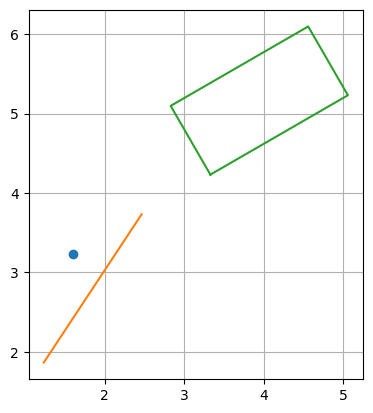

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid(True)

p = Point(1, 1)
l = Line(0, 0, 2, 1)
r = Rectangle(3, 1, 2, 1)

group = Group(p, l, r)

# Transform group as one object
group.move(2, 1)
group.rotate(30, origin=(0, 0))

group.draw(ax)

plt.show()